In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose as sm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor

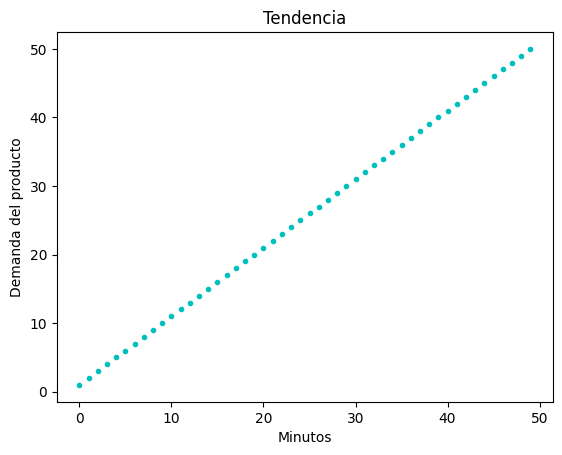

In [46]:
T_series = np.arange(1,51)
Trend = T_series * 2.75
#Grafica 
plt.plot(T_series, 'c.')
plt.title("Tendencia")
plt.xlabel("Minutos")
plt.ylabel("Demanda del producto");


In [47]:
seasonality = 10 + np.sin(T_series) * 10

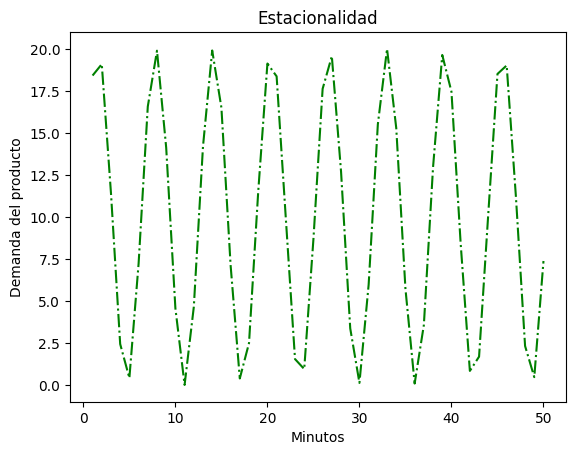

In [48]:
#Grafica 
plt.plot(T_series,seasonality, 'g-.')
plt.title("Estacionalidad")
plt.xlabel("Minutos")
plt.ylabel("Demanda del producto");

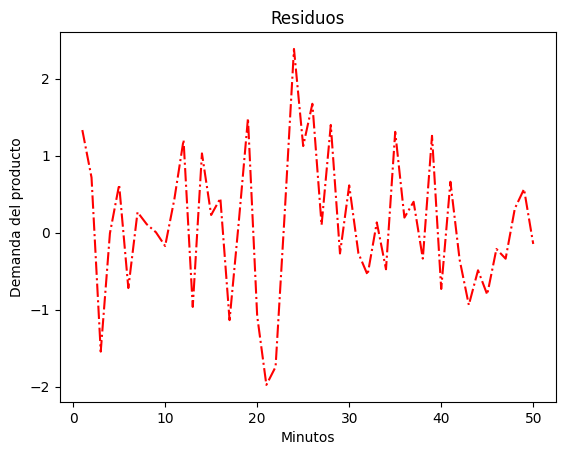

In [49]:
 #Add residual 
np.random.seed(10)
residual = np.random.normal(loc= 0.0,scale=1,size=len(T_series)) 
#Grafica 
plt.plot(T_series,residual, 'r-.')
plt.title("Residuos")
plt.xlabel("Minutos")
plt.ylabel("Demanda del producto");


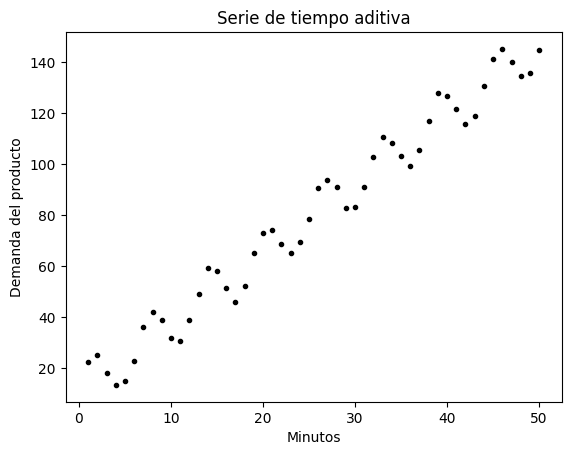

In [50]:
additive_Tmodel = Trend + seasonality + residual
#Grafica 
plt.plot(T_series, additive_Tmodel,'k.')
plt.title("Serie de tiempo aditiva")
plt.xlabel("Minutos")
plt.ylabel("Demanda del producto");

Modelo multiplicativo

In [51]:
ignored_residual = np.ones_like(residual)
multiplicative_Tmodel = Trend * seasonality * ignored_residual

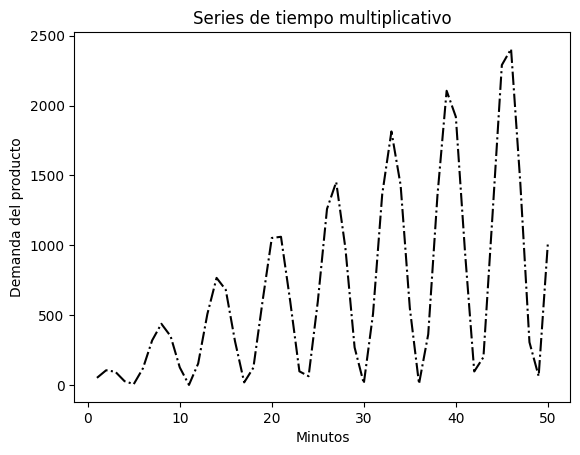

In [52]:
#Grafica 
plt.plot(T_series, multiplicative_Tmodel, 'k-.')
plt.title("Series de tiempo multiplicativo")
plt.xlabel("Minutos")
plt.ylabel("Demanda del producto");

Descomposicion del modelo ST

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

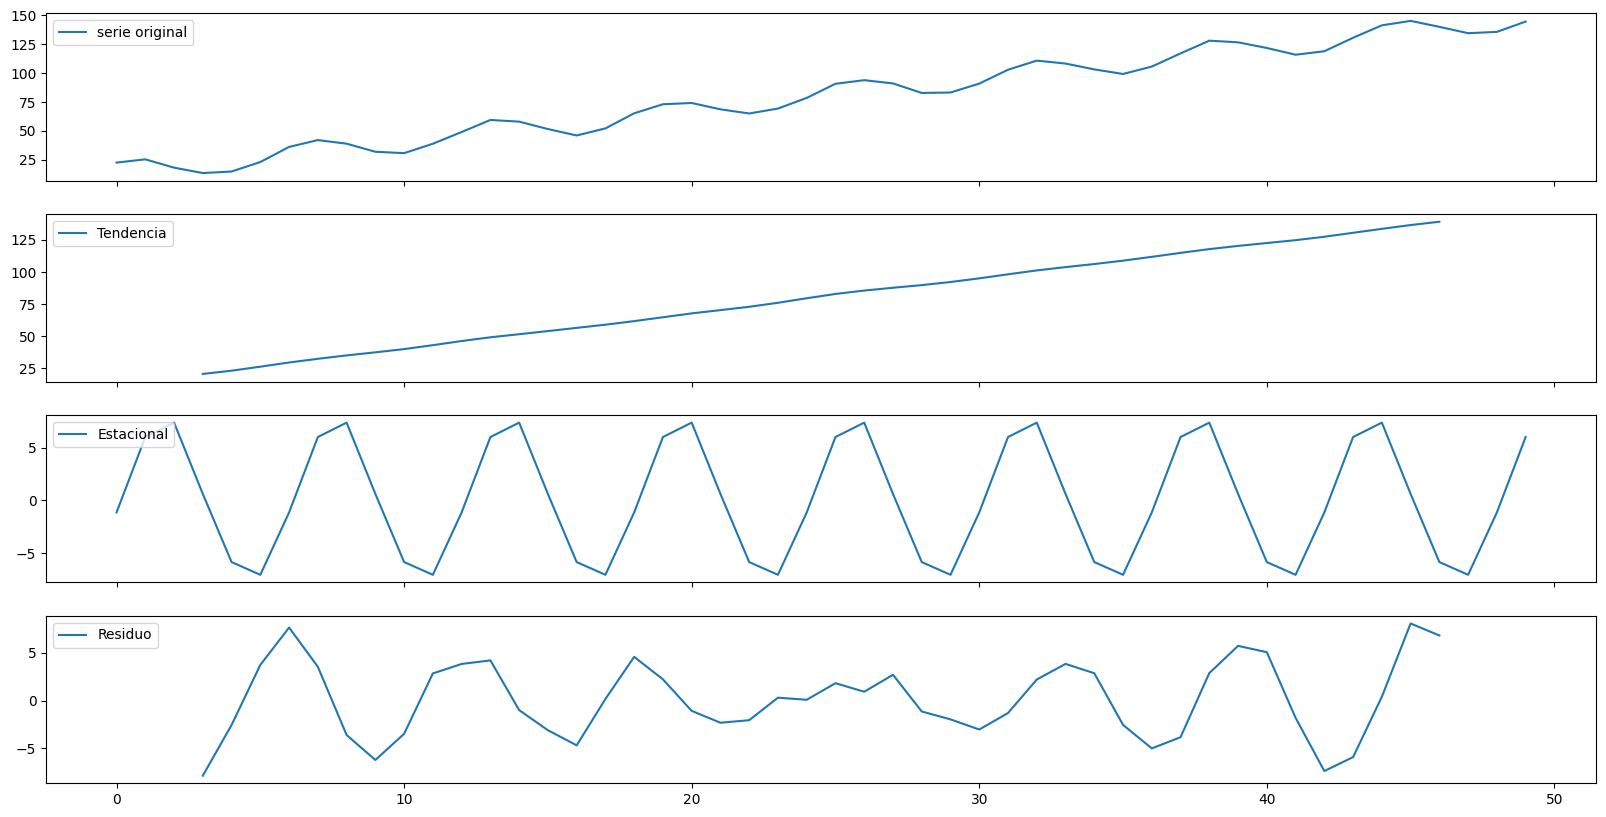

In [54]:
ts_dicomposition = seasonal_decompose(x = additive_Tmodel, model='additive', period = 6)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig,axes = plt.subplots(4,1,sharex=True,  sharey = False)
fig.set_figheight(10)
fig.set_figwidth(20)
#seire original 
axes[0].plot(additive_Tmodel, label= 'serie original')
axes[0].legend(loc='upper left');
#Tendencia segundo 
axes[1].plot(trend_estimate, label= 'Tendencia')
axes[1].legend(loc='upper left');
#componente estacional 
axes[2].plot(seasonal_estimate, label= 'Estacional')
axes[2].legend(loc='upper left');
#residuo 
axes[3].plot(residual_estimate, label= 'Residuo')
axes[3].legend(loc='upper left');


Si hay patrones en el residuo, significa que se quedaron en la tendencia, componente ciclico, o sea q esta bien 

### Clustering de series temporales

In [55]:
!pip install tslearn



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\adona\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [56]:
import tslearn
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import KMeans



In [57]:
dataset = 'Copia de Evaluación XX-120.csv'
df = pd.read_csv(dataset)
X = df[['K.Hz','PHIE.m3/m3']].values
X

array([[1.99769998e+00, 5.39000000e-02],
       [9.15499985e-01, 4.52000010e-02],
       [5.64700007e-01, 1.60000000e-03],
       ...,
       [3.67523987e+02, 5.09999990e-02],
       [3.60936188e+02, 5.35000000e-02],
       [3.32937103e+02, 5.39000000e-02]])

In [58]:
data = np.genfromtxt(dataset, delimiter=',', skip_header=1, usecols=(1, 2))
data

array([[1.99769998e+00, 5.39000000e-02],
       [9.15499985e-01, 4.52000010e-02],
       [5.64700007e-01, 1.60000000e-03],
       ...,
       [3.67523987e+02, 5.09999990e-02],
       [3.60936188e+02, 5.35000000e-02],
       [3.32937103e+02, 5.39000000e-02]])

In [59]:
Y = pd.DataFrame(X, columns=["x1","x2"])
#pd.DataFrame crear un DataFrame, una estructura de datos tabular con filas y colummas 

df = Y
#Mismo dataFrame
 
df.describe()

,x1,x2
count,4249.000000,4249.000000
mean,112.758808,0.040894
std,354.667872,0.034609
min,0.001300,0.000100
25%,2.433200,0.021800
50%,20.194500,0.032900
75%,80.468498,0.049200
max,3734.715088,0.250000


In [60]:
scaler = MinMaxScaler()
scalar_df = scaler.fit_transform(df)

scalar_df= pd.DataFrame(scalar_df,columns=df.columns)

print(scalar_df.describe())
scalar_df


                x1           x2
count  4249.000000  4249.000000
mean      0.030192     0.163240
std       0.094965     0.138492
min       0.000000     0.000000
25%       0.000651     0.086835
50%       0.005407     0.131253
75%       0.021546     0.196479
max       1.000000     1.000000


,x1,x2
0,0.000535,0.215286
1,0.000245,0.180472
2,0.000151,0.006002
3,0.000216,0.007203
4,0.000066,0.004002
...,...,...
4244,0.090127,0.200880
4245,0.097458,0.201681
4246,0.098407,0.203681
4247,0.096643,0.213685


In [61]:
np.random.seed(111)
k= 3

centroids={
    i+1: [np.random.random(), np.random.random()]  
    for i in range(k)
}
print("Ubicacion centroides:")
for centroid, values in centroids.items():
    print(f"Centroide {centroid}: {values}")

Ubicacion centroides:
Centroide 1: [0.6121701756176187, 0.16906975434563642]
Centroide 2: [0.4360590193711702, 0.7692624725231229]
Centroide 3: [0.2953253044028762, 0.1491629571394898]


In [62]:
clustering = KMeans(n_clusters=3, max_iter=300)
clustering.fit(scalar_df)


KMeans(n_clusters=3)

In [63]:
Y['KMeans_Clusters'] = clustering.labels_
Y.head()
Y




,x1,x2,KMeans_Clusters
0,1.997700,0.0539,0
1,0.915500,0.0452,0
2,0.564700,0.0016,2
3,0.807900,0.0019,2
4,0.248900,0.0011,2
...,...,...,...
4244,336.600311,0.0503,0
4245,363.979706,0.0505,0
4246,367.523987,0.0510,0
4247,360.936188,0.0535,0


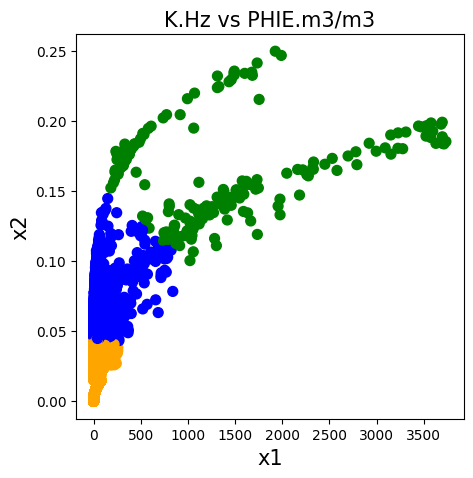

In [64]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)  


ax.set_xlabel('x1', fontsize=15)
ax.set_ylabel('x2', fontsize=15)
ax.set_title('K.Hz vs PHIE.m3/m3', fontsize=15)

color_theme = np.array(["blue", "green", "orange"])  

ax.scatter(Y['x1'], Y['x2'], c=color_theme[Y['KMeans_Clusters']], s=50)  # Ajusta X['KMeans_Clusters']


plt.show()


In [65]:
cluster_counts = Y['KMeans_Clusters'].value_counts()
print(cluster_counts)

KMeans_Clusters
2    2921
0    1144
1     184
Name: count, dtype: int64


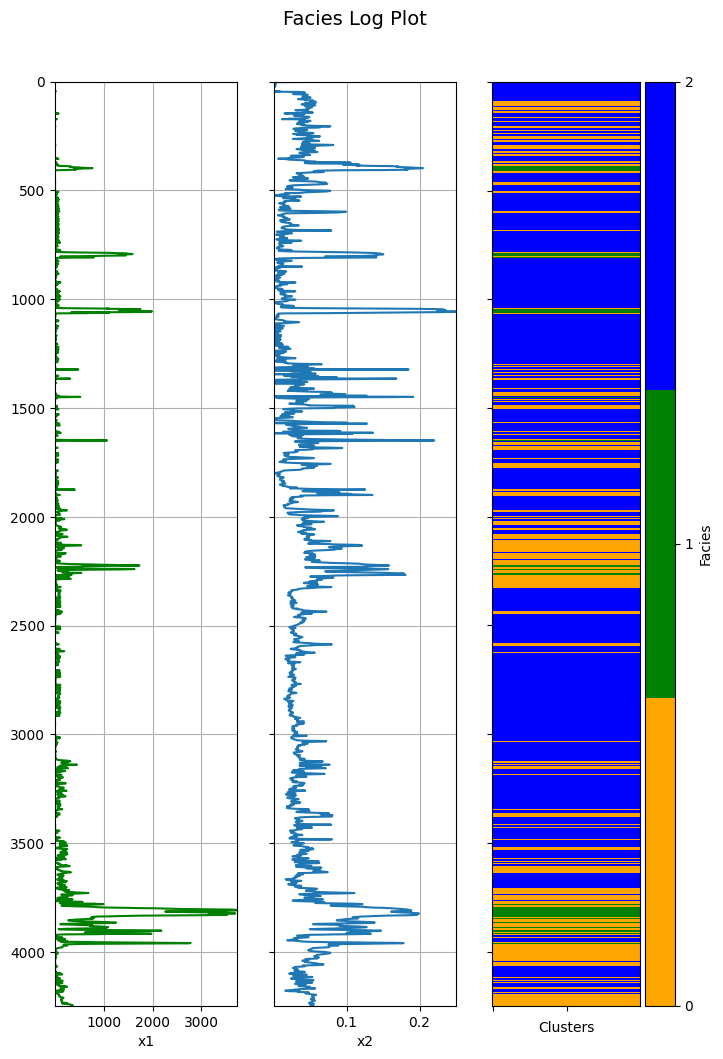

In [66]:
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors):

    logs = logs.sort_index()
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop = logs.index.min()
    zbot = logs.index.max()
    
    # Crear la matriz de facies para el gráfico de imagen
    cluster = np.repeat(np.expand_dims(logs['KMeans_Clusters'].values, 1), 100, 1)
    
    # Crear la figura y los subgráficos
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 12))
    ax[0].plot(logs.x1, logs.index, '-g')
    ax[1].plot(logs.x2, logs.index, '-')
    
    # Gráfico de facies
    im = ax[2].imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=0, vmax=len(facies_colors)-1)
    
    # Añadir barra de color para el gráfico de facies
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Facies')
    cbar.set_ticks(range(len(facies_colors)))
    cbar.set_ticklabels(range(len(facies_colors)))
    
    # Ajustar límites y configuración de los ejes
    for i in range(len(ax) - 1):
        ax[i].set_ylim(ztop, zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    # Etiquetas y límites del eje X
    ax[0].set_xlabel("x1")
    ax[0].set_xlim(logs.x1.min(), logs.x1.max())
    ax[1].set_xlabel("x2")
    ax[1].set_xlim(logs.x2.min(), logs.x2.max())
    ax[2].set_xlabel('Clusters')
    
    # Eliminar etiquetas de los ejes Y en los gráficos del medio
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[2].set_xticklabels([])
    
    # Título de la figura
    f.suptitle('Facies Log Plot', fontsize=14, y=0.94)
    plt.show()

# Ejemplo de uso:
# Definir colores de facies (tres colores para tres clusters)
facies_colors = ['orange', 'green', 'blue']


df_normalizada = pd.DataFrame(Y)

# Llamar a la función
make_facies_log_plot(df_normalizada, facies_colors)

In [67]:
cluster_counts = Y['KMeans_Clusters'].value_counts()
print(cluster_counts)

KMeans_Clusters
2    2921
0    1144
1     184
Name: count, dtype: int64


In [68]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(scalar_df)
Y['4_KMeans_Clusters'] = clustering.labels_
Y.head()
Y

,x1,x2,KMeans_Clusters,4_KMeans_Clusters
0,1.997700,0.0539,0,2
1,0.915500,0.0452,0,2
2,0.564700,0.0016,2,0
3,0.807900,0.0019,2,0
4,0.248900,0.0011,2,0
...,...,...,...,...
4244,336.600311,0.0503,0,2
4245,363.979706,0.0505,0,2
4246,367.523987,0.0510,0,2
4247,360.936188,0.0535,0,2


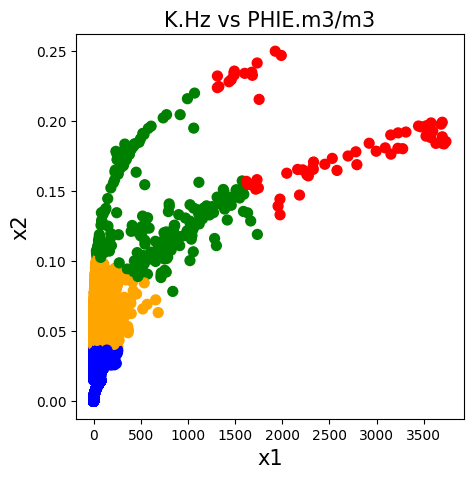

4_KMeans_Clusters
0    2520
2    1443
1     224
3      62
Name: count, dtype: int64


In [69]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)  


ax.set_xlabel('x1', fontsize=15)
ax.set_ylabel('x2', fontsize=15)
ax.set_title('K.Hz vs PHIE.m3/m3', fontsize=15)

color_theme = np.array(["blue", "green", "orange","red"])  

ax.scatter(Y['x1'], Y['x2'], c=color_theme[Y['4_KMeans_Clusters']], s=50)  # Ajusta X['KMeans_Clusters']


plt.show()
cluster_counts = Y['4_KMeans_Clusters'].value_counts()
print(cluster_counts)

In [70]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(scalar_df)
Y['5_KMeans_Clusters'] = clustering.labels_
Y.head()
Actualizada = Y
Actualizada

,x1,x2,KMeans_Clusters,4_KMeans_Clusters,5_KMeans_Clusters
0,1.997700,0.0539,0,2,0
1,0.915500,0.0452,0,2,0
2,0.564700,0.0016,2,0,1
3,0.807900,0.0019,2,0,1
4,0.248900,0.0011,2,0,1
...,...,...,...,...,...
4244,336.600311,0.0503,0,2,0
4245,363.979706,0.0505,0,2,0
4246,367.523987,0.0510,0,2,0
4247,360.936188,0.0535,0,2,0


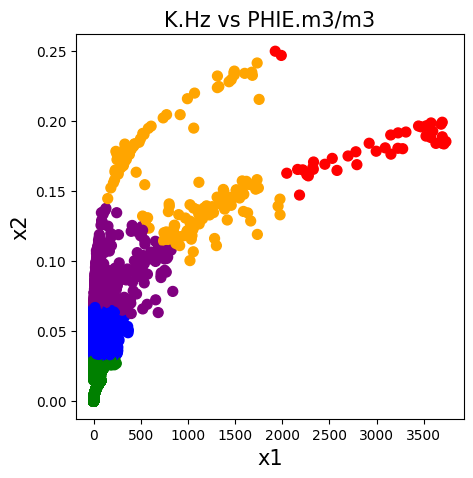

5_KMeans_Clusters
1    1985
0    1723
4     355
2     146
3      40
Name: count, dtype: int64


In [71]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)  


ax.set_xlabel('x1', fontsize=15)
ax.set_ylabel('x2', fontsize=15)
ax.set_title('K.Hz vs PHIE.m3/m3', fontsize=15)

color_theme = np.array(["blue", "green", "orange","red","purple"])  

ax.scatter(Y['x1'], Y['x2'], c=color_theme[Y['5_KMeans_Clusters']], s=50)  # Ajusta X['KMeans_Clusters']


plt.show()
cluster_counts = Y['5_KMeans_Clusters'].value_counts()
print(cluster_counts)

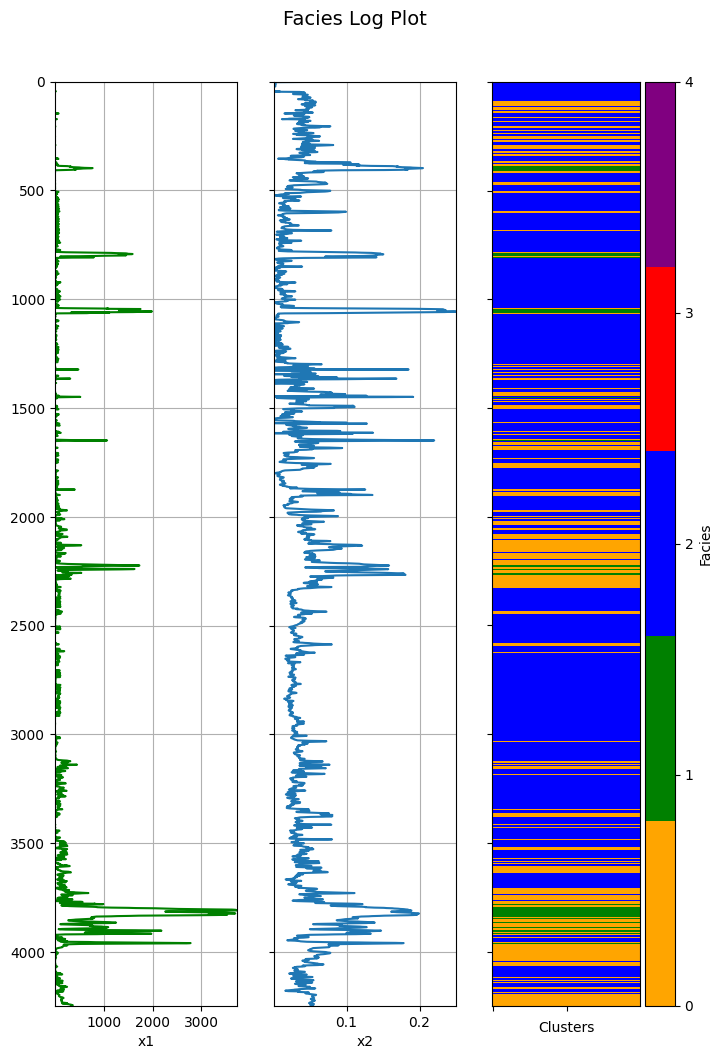

In [73]:
def make_facies_log_plot3(logs, facies_colors):

    logs = logs.sort_index()
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop = logs.index.min()
    zbot = logs.index.max()
    
    # Crear la matriz de facies para el gráfico de imagen
    cluster1 = np.repeat(np.expand_dims(logs['KMeans_Clusters'].values, 1), 100, 1)
    cluster2 = np.repeat(np.expand_dims(logs['4_KMeans_Clusters'].values, 1), 100, 1)
    cluster3 = np.repeat(np.expand_dims(logs['5_KMeans_Clusters'].values, 1), 100, 1)
    
    # Crear la figura y los subgráficos
    f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
    ax[0].plot(logs.x1, logs.index, '-g')
    ax[1].plot(logs.x2, logs.index, '-')
    
    # Gráfico de facies
    im = ax[2].imshow(cluster1, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=0, vmax=len(facies_colors)-1)
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Facies')
    cbar.set_ticks(range(len(facies_colors)))
    cbar.set_ticklabels(range(len(facies_colors)))

    im2 = ax[3].imshow(cluster2, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=0, vmax=len(facies_colors)-1)
    divider2 = make_axes_locatable(ax[3])
    cax2 = divider2.append_axes("right", size="20%", pad=0.05)
    cbar2 = plt.colorbar(im2, cax=cax2)
    cbar2.set_label('Facies')
    cbar2.set_ticks(range(len(facies_colors)))
    cbar2.set_ticklabels(range(len(facies_colors)))
    
    # Gráfico de facies para el tercer cluster
    im3 = ax[4].imshow(cluster3, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=0, vmax=len(facies_colors)-1)
    divider3 = make_axes_locatable(ax[4])
    cax3 = divider3.append_axes("right", size="20%", pad=0.05)
    cbar3 = plt.colorbar(im3, cax=cax3)
    cbar3.set_label('Facies')
    cbar3.set_ticks(range(len(facies_colors)))
    cbar3.set_ticklabels(range(len(facies_colors)))
    
    # Ajustar límites y configuración de los ejes
    for i in range(len(ax) - 1):
        ax[i].set_ylim(ztop, zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    # Etiquetas y límites del eje X
    ax[0].set_xlabel("x1")
    ax[0].set_xlim(logs.x1.min(), logs.x1.max())
    ax[1].set_xlabel("x2")
    ax[1].set_xlim(logs.x2.min(), logs.x2.max())
    ax[2].set_xlabel('3_Clusters')
    ax[3].set_xlabel('4_Clusters')
    ax[4].set_xlabel('5_Clusters')
    
    # Eliminar etiquetas de los ejes Y en los gráficos del medio
    ax[1].set_yticklabels([])
    ax[2].set_yticklabels([])
    ax[3].set_yticklabels([])
    ax[4].set_yticklabels([])
    ax[2].set_xticklabels([])
    ax[3].set_xticklabels([])
    ax[4].set_xticklabels([])
    
    # Título de la figura
    f.suptitle('Clusters', fontsize=14, y=0.94)
    plt.show()

# Ejemplo de uso:
# Definir colores de facies (tres colores para tres clusters)
facies_colors = ['orange', 'green', 'blue','red', 'purple']


df_normalizada = pd.DataFrame(Y)

# Llamar a la función
make_facies_log_plot(df_normalizada, facies_colors)

DBSCAN

In [74]:
def calculate_kn_distance(X, neigh=4):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)

def get_eps(X, neigh=4):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1,1), eps_dist.reshape(-1,1)],1)
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

In [75]:
dataset = 'Copia de Evaluación XX-120.csv'
df = pd.read_csv(dataset)
X = df[['K.Hz','PHIE.m3/m3']].values
Y = pd.DataFrame(X, columns=["x1","x2"])
df = Y
 
df.describe()

,x1,x2
count,4249.000000,4249.000000
mean,112.758808,0.040894
std,354.667872,0.034609
min,0.001300,0.000100
25%,2.433200,0.021800
50%,20.194500,0.032900
75%,80.468498,0.049200
max,3734.715088,0.250000


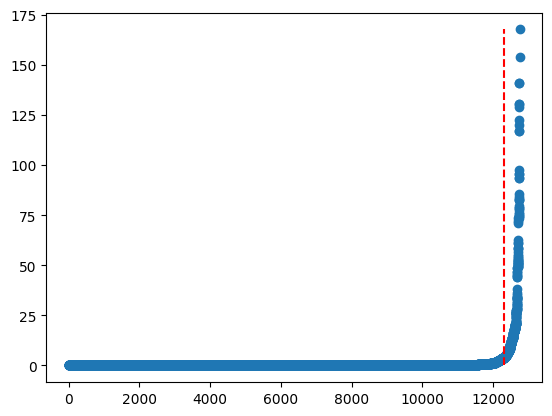

3.9583513980988965


In [76]:
idx, eps = get_eps(df)

plt.show()

print(eps)

In [78]:
dbscan = DBSCAN(eps=3.9, min_samples=10)
clusters = dbscan.fit_predict(df)
Actualizada['DBSCAN'] = clusters
Actualizada

,x1,x2,KMeans_Clusters,4_KMeans_Clusters,5_KMeans_Clusters,DBSCAN
0,1.997700,0.0539,0,2,0,0
1,0.915500,0.0452,0,2,0,0
2,0.564700,0.0016,2,0,1,0
3,0.807900,0.0019,2,0,1,0
4,0.248900,0.0011,2,0,1,0
...,...,...,...,...,...,...
4244,336.600311,0.0503,0,2,0,-1
4245,363.979706,0.0505,0,2,0,-1
4246,367.523987,0.0510,0,2,0,-1
4247,360.936188,0.0535,0,2,0,-1


In [79]:
Actualizada.to_excel('clustering.xlsx',index=False)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

def make_facies_log_plot(logs, facies_colors):
    logs = logs.sort_index()
    cmap_facies = colors.ListedColormap(facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop = logs.index.min()
    zbot = logs.index.max()
    
    # Crear las matrices de facies para los gráficos de imagen
    cluster1 = np.repeat(np.expand_dims(logs['KMeans_Clusters'].values, 1), 100, 1)
    cluster4 = np.repeat(np.expand_dims(logs['4_KMeans_Clusters'].values, 1), 100, 1)
    cluster5 = np.repeat(np.expand_dims(logs['5_KMeans_Clusters'].values, 1), 100, 1)
    dbscan = np.repeat(np.expand_dims(logs['DBSCAN'].values, 1), 100, 1)
    
    # Crear la figura y los subgráficos
    ncols = 6
    f, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(8 + 2 * ncols, 12))
    
    # Graficar las variables x1 y x2
    ax[0].plot(logs.x1, logs.index, '-g')
    ax[1].plot(logs.x2, logs.index, '-')
    
    # Función auxiliar para graficar facies
    def plot_facies(ax, cluster, title):
        unique_clusters = np.unique(cluster)
        cmap_facies = colors.ListedColormap([facies_colors[i] for i in unique_clusters], 'indexed')
        im = ax.imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies, vmin=0, vmax=len(facies_colors)-1)
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="20%", pad=0.05)
        cbar = plt.colorbar(im, cax=cax)
        cbar.set_label('Clusters')
        cbar.set_ticks(range(len(facies_colors)))
        cbar.set_ticklabels(range(len(facies_colors)))
        ax.set_xlabel(title)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
    
    # Gráficos de facies
    plot_facies(ax[2], cluster1, 'KMeans_Clusters')
    plot_facies(ax[3], cluster4, '4_KMeans_Clusters')
    plot_facies(ax[4], cluster5, '5_KMeans_Clusters')
    plot_facies(ax[5], dbscan, 'DBSCAN')
    
    # Ajustar límites y configuración de los ejes
    for i in range(2):
        ax[i].set_ylim(ztop, zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    # Etiquetas y límites del eje X para x1 y x2
    ax[0].set_xlabel("x1")
    ax[0].set_xlim(logs.x1.min(), logs.x1.max())
    ax[1].set_xlabel("x2")
    ax[1].set_xlim(logs.x2.min(), logs.x2.max())
    
    # Eliminar etiquetas de los ejes Y en los gráficos del medio
    for i in range(1, ncols):
        ax[i].set_yticklabels([])
    
    # Título de la figura
    f.suptitle('K-means y DBSCAN', fontsize=14, y=0.94)
    plt.show()

# Ejemplo de uso:
# Supongamos que tienes un DataFrame 'logs' y una lista de colores 'facies_colors'
# make_facies_log_plot(logs, facies_colors)


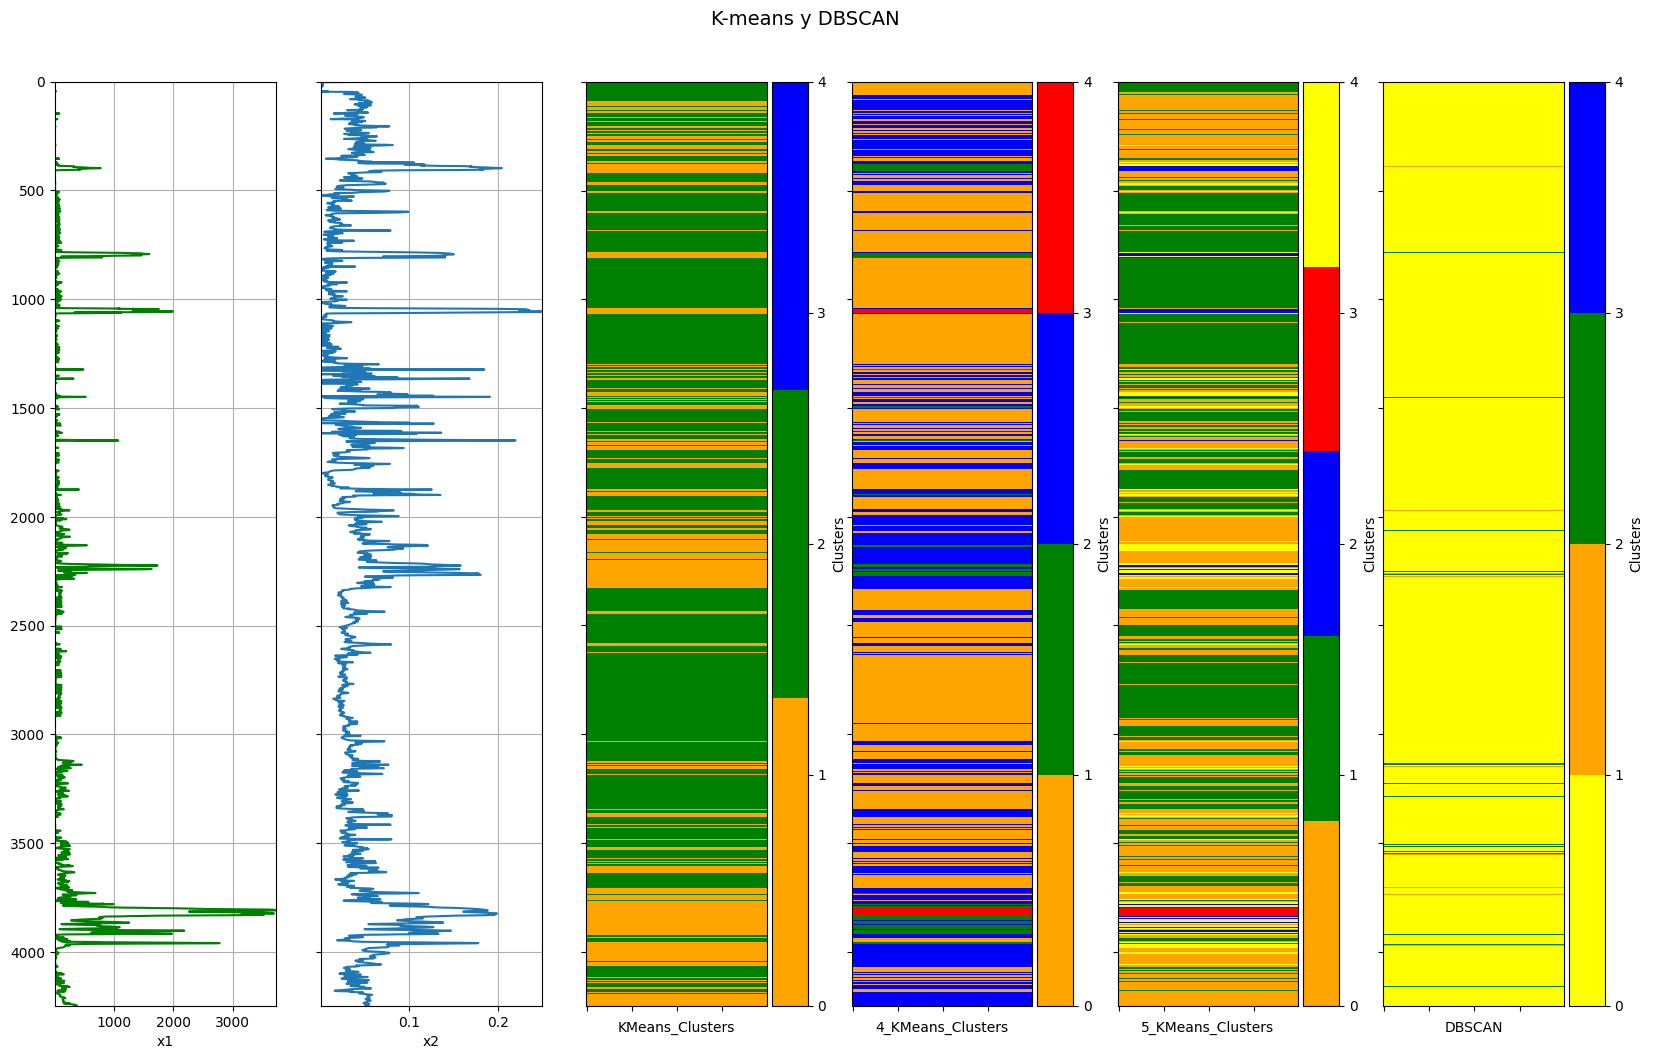

In [85]:
facies_colors = ['orange', 'green', 'blue','red','yellow']


df_graficada = pd.DataFrame(Actualizada)

# Llamar a la función
make_facies_log_plot(df_graficada, facies_colors)